## 1.  Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data_kaggle.csv')

In [3]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [4]:
df.describe()

,Bathrooms,Car Parks
count,51870.000000,36316.000000
mean,3.073434,2.007848
std,1.631079,1.310427
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
Location         53883 non-null object
Price            53635 non-null object
Rooms            52177 non-null object
Bathrooms        51870 non-null float64
Car Parks        36316 non-null float64
Property Type    53858 non-null object
Size             52820 non-null object
Furnishing       46953 non-null object
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Location,object,0,0.00,112,"[duta Nusantara, Kuala Lumpur, Taming Jaya, Ku..."
1,Price,object,248,0.46,4280,"[RM 720,900, RM 2,357,250]"
2,Rooms,object,1706,3.17,43,"[9+1, 20 Above]"
3,Bathrooms,float64,2013,3.74,17,"[1.0, 15.0]"
4,Car Parks,float64,17567,32.60,21,"[3.0, 2.0]"
5,Property Type,object,25,0.05,99,"[Townhouse (EndLot), Condominium (Studio)]"
6,Size,object,1063,1.97,6190,"[Built-up : 697 sq. ft., Land area : 32*75 sq...."
7,Furnishing,object,6930,12.86,4,"[Unfurnished, nan]"


## 2. Data Cleaning

### 2.1 Handle Missing Value

In [7]:
df.dropna(subset=['Price','Rooms','Bathrooms','Property Type','Size','Furnishing'],inplace=True)
df.drop(['Car Parks'],axis=1,inplace=True)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Location,object,0,0.0,98,"[Taman Yarl, Kuala Lumpur, Sri Hartamas, Kuala..."
1,Price,object,0,0.0,3634,"[RM 2,688,800, RM 2,128,950]"
2,Rooms,object,0,0.0,43,"[10+1, 11]"
3,Bathrooms,float64,0,0.0,17,"[3.0, 10.0]"
4,Property Type,object,0,0.0,94,"[Townhouse (Intermediate), Bungalow Land]"
5,Size,object,0,0.0,5427,"[Built-up : 2,746 sq. ft., Land area : 14800 s..."
6,Furnishing,object,0,0.0,4,"[Unfurnished, Partly Furnished]"


### 2.2 Location Colomn

> Location Selection, only select location which has a value counts more than 100

In [8]:
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].str.replace(', kuala lumpur','')

In [9]:
len(sorted(df['Location'].unique()))

97

In [10]:
vc_location = df['Location'].value_counts()
list_location_to_remove = vc_location[vc_location < 100].index
index_to_remove = df.loc[np.isin(df["Location"], list_location_to_remove)].index
df.drop(index_to_remove , inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
len(df['Location'].value_counts())

48

### 2.3 Price Colomn Cleaning

> Formatting the Price

In [12]:
df['Price'] = df['Price'].str.replace('RM ', '')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])

> Handle Outlier Data With IQR Method

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df["Price"].describe()

count        44636.00000
mean       1787142.44146
std        7958177.81104
min            308.00000
25%         598000.00000
50%         999999.50000
75%        1930000.00000
max     1600000000.00000
Name: Price, dtype: float64

In [15]:
def check_outlier(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index ,upper_limit,lower_limit
id_to_drop,upper,lower = check_outlier(df,'Price')
df.drop(id_to_drop,inplace=True)

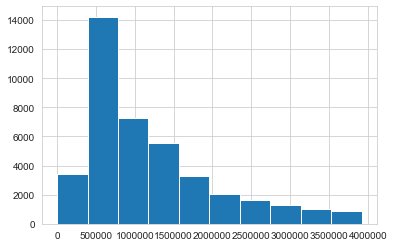

In [16]:
df['Price'].hist()

### 2.4 Rooms Colomn Cleaning

In [17]:
df['Rooms'][0:5]

0    2+1
2      3
3    4+1
5      5
6    4+1
Name: Rooms, dtype: object

> Convert Room

In [18]:
import re

In [19]:
def convert_room(rooms):
        if rooms.endswith("+"):
            return int(rooms[:-1])
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return rooms

In [20]:
df['Rooms'] = pd.to_numeric(df['Rooms'].apply(convert_room))

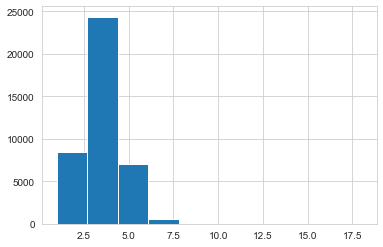

In [21]:
df['Rooms'].hist()

### 2.5 Handling Bathrooms Colomn 

In [22]:
def to_int(x):
    return int(x)

In [23]:
df['Bathrooms'] = df['Bathrooms'].apply(to_int)

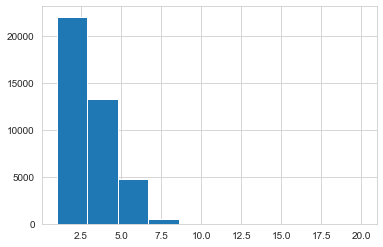

In [24]:
df['Bathrooms'].hist()

### 2.6 Handling Property Type

In [25]:
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium", 
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse", 
        "Flat", "Residential Land", "Cluster House"]
    for super_type in super_types:
        if re.search(super_type, prop_type, flags=re.IGNORECASE) is not None:
            return super_type
    
    return prop_type

In [26]:
df['Property Type Group'] = df['Property Type'].apply(simplify_property_type)

In [27]:
df['Property Type Group'].value_counts()

Condominium            18986
Serviced Residence     11032
Terrace/Link House      6289
Semi-detached House     1458
Apartment               1324
Bungalow                 743
Townhouse                441
Flat                     232
Residential Land          13
Cluster House              5
Name: Property Type Group, dtype: int64

> Deleting the data with Property type group Residental Land and Cluster House, because this group too small

In [28]:
df.drop(df[(df['Property Type Group'] == 'Residential Land') | (df['Property Type Group'] == 'Cluster House')].index,inplace=True)

### 2.7 Size Colomn

In [29]:
def size_type(size):
    size = size.split(':')
    size_type = size[0]
    return size_type

def size_num(size):
    size = size.split(':')
    size_num = size[1]
    size_num = size_num.replace(' sq. ft.','')
    size_num = size_num.lower()
    size_num = size_num.replace(' ','')
    size_num = size_num.replace('sf','')
    if 'x' in size_num:
        num = size_num.split('x')
        try:
            return int(num[0]) * int(num[1])
        except:
            return None
    try:
        return int(size_num.replace(',',''))
    except:
        return None

In [30]:
df['Size Type'] = df['Size'].apply(size_type)

In [31]:
df['Size Num'] = df['Size'].apply(size_num)

> Outlier Checking

In [32]:
df['Size Num'].describe()

count      40210.00000
mean        3617.94332
std       230404.95272
min            0.00000
25%          990.00000
50%         1328.00000
75%         1876.00000
max     40232000.00000
Name: Size Num, dtype: float64

In [33]:
df.drop(df[df['Size Num'] < 100].index,inplace=True)
index,upper,lower= check_outlier(df,'Size Num')
df.drop(index,inplace=True)
df.dropna(inplace=True)

In [34]:
df.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Property Type Group,Size Type,Size Num
0,klcc,1250000,3,3,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Serviced Residence,Built-up,1335.00000
2,dutamas,1030000,3,4,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Condominium,Built-up,1875.00000
3,bukit jalil,900000,5,3,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Condominium,Built-up,1513.00000
6,taman tun dr ismail,1950000,5,4,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,Terrace/Link House,Land area,1875.00000
7,sri petaling,385000,3,2,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,Apartment,Built-up,904.00000


### 2.8 Furnishing Colomn Handling

In [35]:
df['Furnishing'].value_counts()

Partly Furnished    19492
Fully Furnished     11773
Unfurnished          4379
Unknown               370
Name: Furnishing, dtype: int64

## 3.  Modelling

### 3.1 First Modelling

In [36]:
from sklearn.model_selection import KFold

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
x = df[['Location','Rooms','Bathrooms','Furnishing','Property Type Group','Size Type','Size Num']]
y = df['Price']

In [39]:
x = pd.get_dummies(x,drop_first=True)

In [40]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor]
    for item in models:
        rmse = []
        mae = []
        kf = KFold(n_splits=n_cv,shuffle=True)
        for train_index , test_index in kf.split(x,y):
            X_train,X_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))

        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv
        ]
        score.append(temp)
    return pd.DataFrame(score,columns=['MAE','RMSE'],index=model_name)

In [41]:
regression_model(5)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/skl

,MAE,RMSE
Linear Regression,225376.31600,341593.72800
Lasso,225471.76200,341604.86600
Ridge,225416.28400,341578.86600
DecisionTreeRegressor,125091.54000,261873.90000
RandomForestRegressor,118154.30200,226946.94800
GradientBoostingRegressor,206294.60800,313444.68400


### 3.2 Second Modelling

In [42]:
x_y = df[['Location','Rooms','Bathrooms','Furnishing','Property Type Group','Size Type','Size Num','Price']]
x_y = x_y[x_y['Price'] < 1200000]

In [43]:
x_y = x_y[x_y['Price'] > 20000]

In [44]:
x_y = x_y.drop(x_y[x_y['Furnishing'] == 'Unknown'].index)
x = x_y.drop(['Price'],axis=1)
y = x_y['Price']
x =pd.get_dummies(x)

In [45]:
regression_model(5)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38808347310797.5, tolerance: 109445395970.86548
  positive)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38958987285365.53, tolerance: 110197514157.2615
  positive)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39128177305950.84, tolerance: 109782061850.89323
  positive)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

,MAE,RMSE
Linear Regression,110336.87200,144223.05400
Lasso,110367.23000,144289.23800
Ridge,110364.25000,144332.62800
DecisionTreeRegressor,60848.95800,101387.82000
RandomForestRegressor,57537.55800,88845.75200
GradientBoostingRegressor,102703.11000,131666.84800


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test, y_train,y_test = train_test_split(x,y)

In [48]:
model = RandomForestRegressor()

In [49]:
model.fit(X_train,y_train)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
prediction = model.predict(X_test)

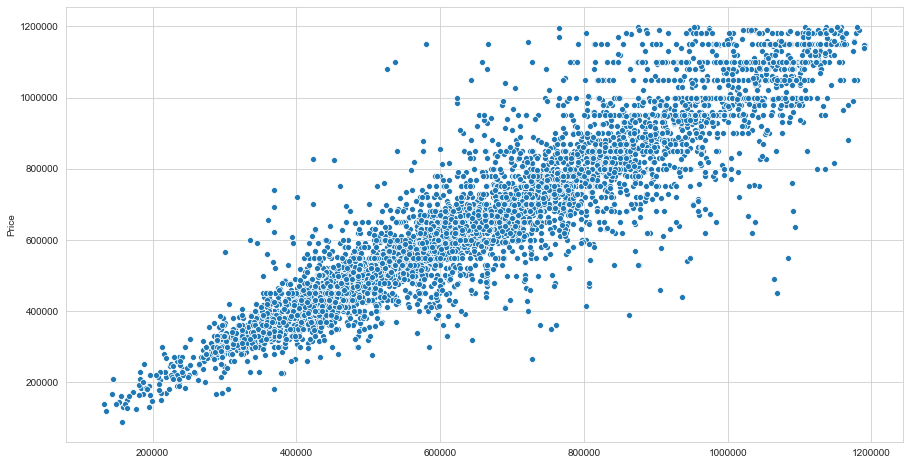

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction,y_test)

In [52]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])

In [53]:
df_prediction.sort_values(by='Selisih',ascending=False)

,y_true,y_pred,Selisih
20511,450000,1069166.66667,619166.66667
27196,490000,1064766.66667,574766.66667
842,1150000,580696.66667,569303.33333
34116,1100000,537500.00000,562500.00000
13147,1080000,526000.00000,554000.00000
43704,550000,1083900.00000,533900.00000
27303,440000,937000.00000,497000.00000
19334,1150000,666466.66667,483533.33333
17588,388000,863000.00000,475000.00000
26055,265000,727856.66667,462856.66667


In [54]:
mean_absolute_error(y_test,prediction)

57267.336616186105

In [55]:
r2_score(y_test,prediction)

0.8650086989521776

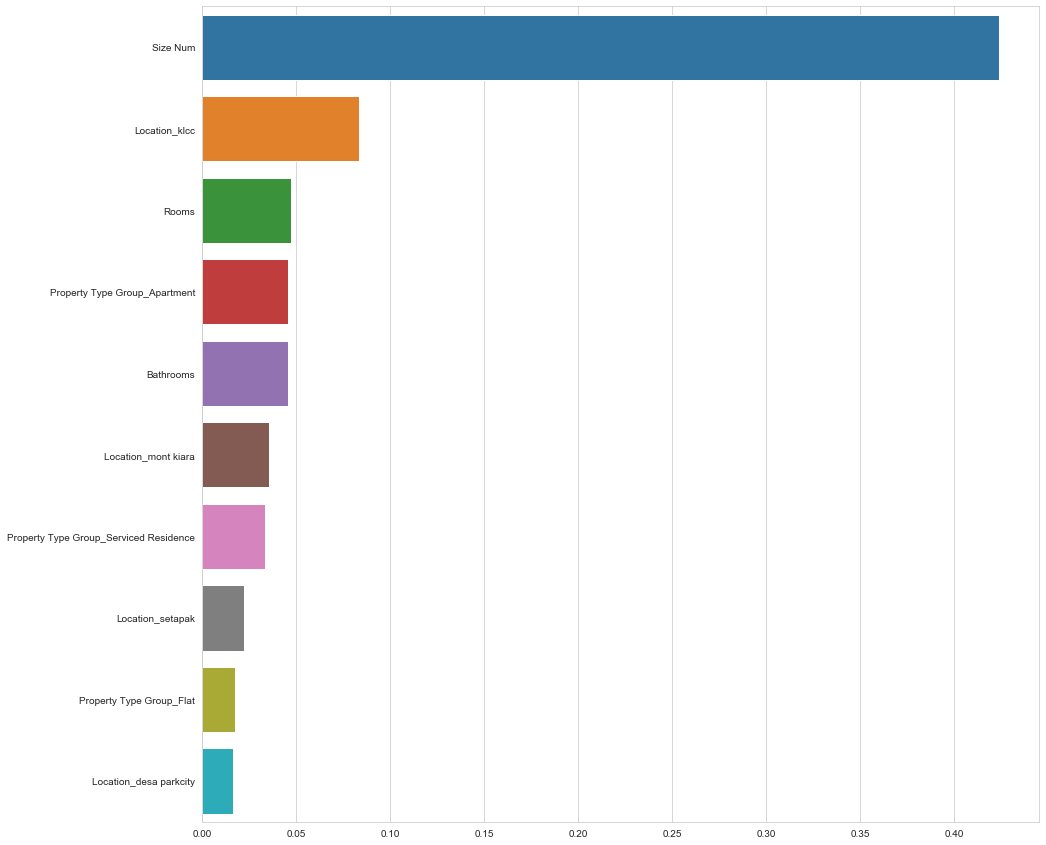

In [56]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

## Export Model

In [57]:
import pickle

In [58]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
filename = 'x_dummies_colomn.sav'
pickle.dump(x_y.columns, open(filename , 'wb'))

In [60]:
filename = 'real_colomn.sav'
pickle.dump(df.drop('Price',axis=1).columns, open(filename , 'wb'))

In [61]:
df.Location.unique()

array(['klcc', 'dutamas', 'bukit jalil', 'taman tun dr ismail',
       'sri petaling', 'mont kiara', 'desa parkcity', 'damansara heights',
       'bangsar south', 'kepong', 'ampang hilir',
       'jalan klang lama (old klang road)', 'sungai besi', 'kl city',
       'kl sentral', 'taman melawati', 'setapak', 'city centre',
       'taman desa', 'sentul', 'segambut', 'wangsa maju', 'batu caves',
       'bangsar', 'setiawangsa', 'jalan sultan ismail', 'jalan kuching',
       'bandar menjalara', 'cheras', 'ampang', 'sunway spk',
       'kl eco city', 'pantai', 'bukit bintang', 'kuchai lama', 'seputeh',
       'jalan ipoh', 'oug', 'desa pandan', 'brickfields',
       'bukit tunku (kenny hills)', 'sri hartamas', 'desa petaling',
       'bandar damai perdana', 'keramat', 'salak selatan', 'titiwangsa',
       'country heights damansara'], dtype=object)

In [62]:
x_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24274 entries, 2 to 44635
Data columns (total 8 columns):
Location               24274 non-null object
Rooms                  24274 non-null int64
Bathrooms              24274 non-null int64
Furnishing             24274 non-null object
Property Type Group    24274 non-null object
Size Type              24274 non-null object
Size Num               24274 non-null float64
Price                  24274 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


In [63]:
x_y['Property Type Group'].unique()

array(['Condominium', 'Apartment', 'Serviced Residence',
       'Terrace/Link House', 'Townhouse', 'Flat', 'Semi-detached House',
       'Bungalow'], dtype=object)